In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [4]:
#Panggil data
df = pd.read_csv('insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Dataset ini biasanya digunakan untuk memprediksi biaya asuransi berdasarkan sejumlah fitur lainnya.
Dataset ini biasanya terdiri dari beberapa kolom yang mewakili berbagai atribut atau fitur. Beberapa kolom umum yang biasanya ada dalam dataset asuransi mencakup:

age: Usia.

sex: Jenis kelamin.

bmi: Indeks Massa Tubuh (BMI).

children: Jumlah anak/anak-anak dalam tanggungan.

smoker: Status perokok.

region: Wilayah tempat tinggal atau terdaftar.

charges: Biaya asuransi yang dibayarkan.

Tujuan Analisis: Tujuan umum dari analisis dataset ini adalah untuk memahami faktor-faktor apa yang mempengaruhi biaya asuransi (charges) dan apakah kita dapat memprediksi biaya asuransi berdasarkan atribut-atribut lainnya seperti usia, jenis kelamin, BMI, jumlah anak, status perokok, dan wilayah tempat tinggal.


In [8]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


Dataset ini memiliki 1337 pengamatan

In [11]:
count_values = df['charges'].value_counts()
count_values

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


In [16]:
# Menghitung rata-rata berdasarkan nilai 'charges' hanya untuk kolom numerik
mean_by_charges = df.groupby('charges')[['age', 'bmi', 'children']].mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'charges'
print(mean_by_charges)

              age     bmi  children
charges                            
1121.87390   18.0  23.210       0.0
1131.50660   18.0  30.140       0.0
1135.94070   18.0  33.330       0.0
1136.39940   18.0  33.660       0.0
1137.01100   18.0  34.100       0.0
...           ...     ...       ...
55135.40209  33.0  35.530       0.0
58571.07448  31.0  38.095       1.0
60021.39897  52.0  34.485       3.0
62592.87309  45.0  30.360       0.0
63770.42801  54.0  47.410       0.0

[1337 rows x 3 columns]


# PREPROCESSING DATA

In [17]:
# Encode data kategorik
df_processed = df.copy()
label_encoders = {}
categorical_cols = df_processed.select_dtypes(include=['object']).columns

for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

Mengubah kolom kategori (sex, smoker, region) menjadi angka agar bisa digunakan oleh model machine learning.

In [18]:
# Buat target klasifikasi binary berdasarkan median charges
threshold = df_processed['charges'].median()
df_processed['high_cost'] = (df_processed['charges'] > threshold).astype(int)

Membuat target klasifikasi biner:

1 jika biaya asuransi di atas median (biaya tinggi)

0 jika di bawah atau sama dengan median (biaya rendah)

In [19]:
# Pisahkan fitur dan target
X = df_processed.drop(columns=['charges', 'high_cost'])
y = df_processed['high_cost']

Memisahkan data menjadi fitur (X) dan target (y).

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Membagi data menjadi 70% latih dan 30% uji.

Menstandardisasi fitur agar skala data seragam (penting untuk algoritma KNN dan Naive Bayes).

# NAVIE BAYES & KNN

In [24]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
y_pred_nb = nb_model.predict(X_test_scaled)

Melatih model Naive Bayes Gaussian, yang mengasumsikan bahwa fitur mengikuti distribusi normal.

In [25]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


Melatih model KNN dengan k=5, yang memprediksi berdasarkan mayoritas label dari 5 tetangga terdekat.

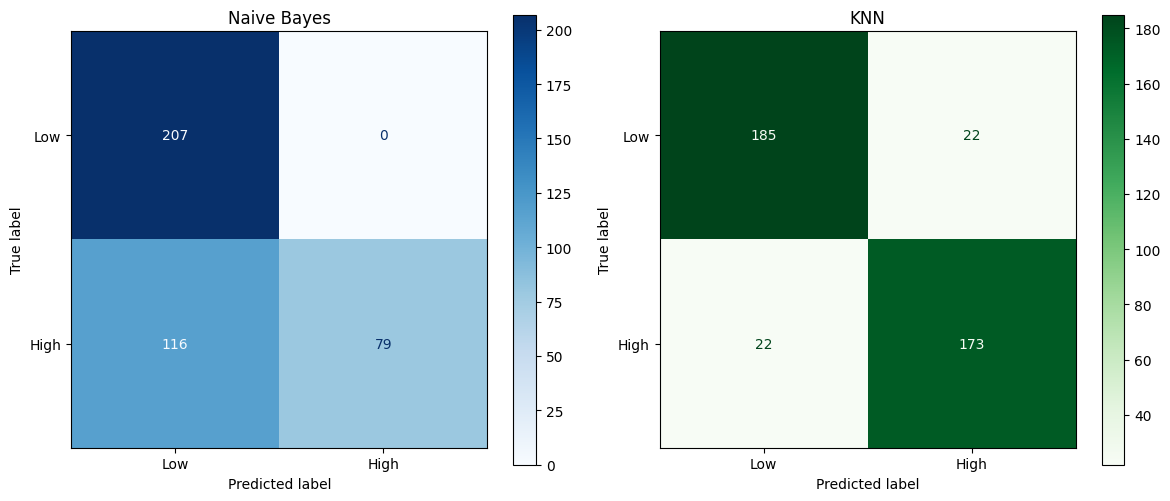

In [27]:

# Tampilkan confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(cm_nb, display_labels=['Low', 'High']).plot(ax=ax[0], cmap='Blues')
ax[0].set_title("Naive Bayes")

ConfusionMatrixDisplay(cm_knn, display_labels=['Low', 'High']).plot(ax=ax[1], cmap='Greens')
ax[1].set_title("KNN")

plt.tight_layout()
plt.show()



*   Menghitung akurasi dan prediksi
*   Menampilkan confusion matrix untuk melihat perfoma klasifikasi


1.  True Positive, True Negative
2.   List item





In [29]:
print(f"Akurasi Naive Bayes: {accuracy_nb * 100:.2f}%")
print(f"Akurasi KNN: {accuracy_knn * 100:.2f}%")

Akurasi Naive Bayes: 71.14%
Akurasi KNN: 89.05%


# KESIMPULAN
**KESIMPULAN**

Berdasarkan hasil klasifikasi pada dataset asuransi menggunakan algoritma Naive Bayes dan K-Nearest Neighbors (KNN), diperoleh bahwa model KNN memiliki akurasi yang lebih tinggi dibandingkan dengan Naive Bayes. Hal ini menunjukkan bahwa KNN lebih efektif dalam mengenali pola pada data tersebut, terutama karena KNN mampu menangani distribusi data yang tidak linear tanpa asumsi distribusi tertentu. Sementara itu, Naive Bayes memiliki keterbatasan karena mengasumsikan bahwa fitur-fitur dalam data memiliki distribusi normal dan bersifat independen, yang kemungkinan besar tidak sepenuhnya terpenuhi dalam dataset ini. Oleh karena itu, dalam kasus klasifikasi biaya asuransi ke dalam kategori tinggi dan rendah, model KNN memberikan performa yang lebih baik dan dapat dipertimbangkan sebagai pilihan yang lebih tepat untuk digunakan.